#Unzipping the file.zip

In [1]:

!unzip file.zip

Archive:  file.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


#Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score


import warnings
warnings.filterwarnings('ignore')

EDA

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

We have been provided three files. A description for what each of these files contain is given below:

sample_submission.csv: This gives us a required format for submitting our solutions to the greay atom solution checker.

train.csv: We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.

test.csv: This will contain all variables in the training dataset except the target variable. We will use our trained model to predict the target for this dataset.

Now lets go on to read and have a look at each of the files.

In [3]:
ss=pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
ss.head(20)

,Price
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


#Brief look at the dataset.

In [5]:
train.head(3)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879


#Dataset Shape

In [6]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')


Train contains 8012 samples and 11 variables

Test contains 2671 samples and 10 variables


#Target Distribution

In [7]:
train['Price'].value_counts(normalize=True)

10262    0.024588
10844    0.020969
7229     0.015726
4804     0.013729
4823     0.011982
           ...   
10366    0.000125
12648    0.000125
6481     0.000125
6477     0.000125
4098     0.000125
Name: Price, Length: 1632, dtype: float64

#Variable Datatypes

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8012 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8012 non-null   object
 1   Date_of_Journey  8012 non-null   object
 2   Source           8012 non-null   object
 3   Destination      8012 non-null   object
 4   Route            8011 non-null   object
 5   Dep_Time         8012 non-null   object
 6   Arrival_Time     8012 non-null   object
 7   Duration         8012 non-null   object
 8   Total_Stops      8011 non-null   object
 9   Additional_Info  8012 non-null   object
 10  Price            8012 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 688.7+ KB


#Null Values

In [9]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Price              0.0
Additional_Info    0.0
Total_Stops        0.0
Duration           0.0
Arrival_Time       0.0
Dep_Time           0.0
Route              0.0
Destination        0.0
Source             0.0
Date_of_Journey    0.0
Airline            0.0
dtype: float64

In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
missing_values_table(train)

Your selected dataframe has 11 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Route,1,0.0
Total_Stops,1,0.0


In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
train[(train.isna().sum(axis=1)>0)==True]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1807,Airline C,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Removing null values is easy in pandas by running the below command:-

In [14]:
train.dropna(inplace=True)

In [15]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Unique values in each variable

In [16]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               122
Dep_Time            219
Arrival_Time       1182
Duration            353
Total_Stops           4
Additional_Info      10
Price              1632
dtype: int64

#We should check if our dataset has any duplicates rows and drop them

In [17]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(117, 11)

In [18]:
#remove duplicate rows in training dataset
train.drop_duplicates(keep='first',inplace=True)

In [19]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(0, 11)

In [20]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [21]:
df_train=train.copy()

# Feature engineering

In [22]:

# Extract day and month of journey from the above column in train dataset

df_train["isWeekend"] = ((pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.dayofweek) // 5 == 1).astype(int)
df_train["Day_of_Week"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day_name()
df_train["Day_Of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"], format = '%d/%m/%Y').dt.day

In [23]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,isWeekend,Day_of_Week,Day_Of_Journey
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480,0,Wednesday,12
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016,0,Tuesday,18
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879,1,Saturday,18
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663,0,Monday,6
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663,0,Thursday,9


In [24]:
#Handling Total_stops

def stops(x):
  if(x=='non-stop'):
    x=str(0)
  else:
    x.strip()
    stps=x.split(' ')[0]
    x=stps
  return x

train['Total_Stops']=train['Total_Stops'].apply(stops)
train['Total_Stops']

0       1
1       0
2       1
3       1
4       1
       ..
8007    1
8008    2
8009    1
8010    1
8011    1
Name: Total_Stops, Length: 7894, dtype: object

In [25]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,0,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...,...,...
8007,Airline A,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,04:40 13 Jun,22h 10m,1,In-flight meal not included,7594
8008,Airline C,9/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 10 Jun,21h 15m,2,No info,10651
8009,Airline A,3/03/2019,Delhi,Cochin,DEL → BOM → COK,08:00,04:25 04 Mar,20h 25m,1,No info,17024
8010,Airline A,18/05/2019,Delhi,Cochin,DEL → BOM → COK,11:30,12:35 19 May,25h 5m,1,In-flight meal not included,12373


In [26]:
# cleaning duration column in train dataset
def changed(test):
    
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
      #t0=total[0]
      mint=(int)(total[1][:-1])
      hrs=hrs+mint
    test=str(hrs)
    return test
  
  
train['Duration']=train['Duration'].apply(changed)
train['Duration']

0        765
1        185
2        925
3        735
4        330
        ... 
8007    1330
8008    1275
8009    1225
8010    1505
8011    1630
Name: Duration, Length: 7894, dtype: object

In [27]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,765,1,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,185,0,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,925,1,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,735,1,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,330,1,In-flight meal not included,9663


In [28]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [29]:
# cleaning duration column in test dataset
def changed(test):
    
    test = test.strip()
    total=test.split(' ')
    to=total[0]
    hrs=(int)(to[:-1])*60
    if((len(total))==2):
      #t0=total[0]
      mint=(int)(total[1][:-1])
      hrs=hrs+mint
    test=str(hrs)
    return test
  
  
test['Duration']=test['Duration'].apply(changed)
test['Duration']

0       675
1       140
2       875
3       280
4       570
       ... 
2666    675
2667    150
2668    425
2669    180
2670    495
Name: Duration, Length: 2671, dtype: object

In [30]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,675,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,140,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,875,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,280,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,570,1 stop,No info


In [31]:
#Handling Total_stops in test

def stops(x):
  if(x=='non-stop'):
    x=str(0)
  else:
    x.strip()
    stps=x.split(' ')[0]
    x=stps
  return x

test['Total_Stops']=test['Total_Stops'].apply(stops)
test['Total_Stops']

0       1
1       0
2       2
3       1
4       1
       ..
2666    1
2667    0
2668    2
2669    0
2670    1
Name: Total_Stops, Length: 2671, dtype: object

In [32]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,675,1,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,140,0,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,875,2,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,280,1,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,570,1,No info


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8011
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7894 non-null   object
 1   Date_of_Journey  7894 non-null   object
 2   Source           7894 non-null   object
 3   Destination      7894 non-null   object
 4   Route            7894 non-null   object
 5   Dep_Time         7894 non-null   object
 6   Arrival_Time     7894 non-null   object
 7   Duration         7894 non-null   object
 8   Total_Stops      7894 non-null   object
 9   Additional_Info  7894 non-null   object
 10  Price            7894 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 740.1+ KB


Dropping Route from train and test

In [34]:
train.drop(['Route'],axis=1,inplace=True)
test.drop(['Route'],axis=1,inplace=True)

In [35]:
test.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,04:55,16:10,675,1,No info
1,Airline E,27-05-2019,Kolkata,Banglore,22:20,28-05-2020 00:40,140,0,No info
2,Airline C,06-06-2019,Kolkata,Banglore,05:50,20:25,875,2,No info
3,Airline A,06-03-2019,Banglore,New Delhi,09:45,14:25,280,1,No info
4,Airline B,15-06-2019,Delhi,Cochin,16:00,16-06-2020 01:30,570,1,No info


In [36]:
train.head(5)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,20:40,09:25 13 Jun,765,1,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,18:55,22:00,185,0,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,03:50,19:15,925,1,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,20:00,08:15 07 May,735,1,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,06:30,12:00,330,1,In-flight meal not included,9663


Extracting Month from Date_of_Journey from train and test

In [37]:
def datej(x):
  x=x.strip()
  xx=x.split('/')
  x=xx[1]
  return x

In [38]:
train['Date_of_Journey']=train['Date_of_Journey'].apply(datej)
train['Date_of_Journey']=train['Date_of_Journey'].astype(str)

In [39]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,06,Delhi,Cochin,20:40,09:25 13 Jun,765,1,No info,7480
1,Airline A,06,Banglore,Delhi,18:55,22:00,185,0,No info,8016
2,Airline C,05,Delhi,Cochin,03:50,19:15,925,1,No info,8879
3,Airline A,05,Kolkata,Banglore,20:00,08:15 07 May,735,1,In-flight meal not included,9663
4,Airline A,05,Kolkata,Banglore,06:30,12:00,330,1,In-flight meal not included,9663


In [40]:
def datej(x):
  x=x.strip()
  xx=x.split('-')
  x=xx[1]
  return x

In [41]:
test['Date_of_Journey']=test['Date_of_Journey'].apply(datej)
test['Date_of_Journey']=test['Date_of_Journey'].astype(str)

In [42]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,03,Delhi,Cochin,04:55,16:10,675,1,No info
1,Airline E,05,Kolkata,Banglore,22:20,28-05-2020 00:40,140,0,No info
2,Airline C,06,Kolkata,Banglore,05:50,20:25,875,2,No info
3,Airline A,03,Banglore,New Delhi,09:45,14:25,280,1,No info
4,Airline B,06,Delhi,Cochin,16:00,16-06-2020 01:30,570,1,No info


Handling Departure time and dropping Arrival time

In [43]:
def deptime(x):
  x=x.strip()
  tt=(int)(x.split(':')[0])
  if(tt>=12):
    x='Evening'
  else:
    x='Morning'
  return x

train['Dep_Time']=train['Dep_Time'].apply(deptime)
train.drop(labels=['Arrival_Time'],axis=1,inplace=True)
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,06,Delhi,Cochin,Evening,765,1,No info,7480
1,Airline A,06,Banglore,Delhi,Evening,185,0,No info,8016
2,Airline C,05,Delhi,Cochin,Morning,925,1,No info,8879
3,Airline A,05,Kolkata,Banglore,Evening,735,1,In-flight meal not included,9663
4,Airline A,05,Kolkata,Banglore,Morning,330,1,In-flight meal not included,9663


In [44]:
def deptime(x):
  x=x.strip()
  tt=(int)(x.split(':')[0])
  if(tt>=12):
    x='Evening'
  else:
    x='Morning'
  return x

test['Dep_Time']=test['Dep_Time'].apply(deptime)
test.drop(labels=['Arrival_Time'],axis=1,inplace=True)
test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info
0,Airline B,03,Delhi,Cochin,Morning,675,1,No info
1,Airline E,05,Kolkata,Banglore,Evening,140,0,No info
2,Airline C,06,Kolkata,Banglore,Morning,875,2,No info
3,Airline A,03,Banglore,New Delhi,Morning,280,1,No info
4,Airline B,06,Delhi,Cochin,Evening,570,1,No info


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8011
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7894 non-null   object
 1   Date_of_Journey  7894 non-null   object
 2   Source           7894 non-null   object
 3   Destination      7894 non-null   object
 4   Dep_Time         7894 non-null   object
 5   Duration         7894 non-null   object
 6   Total_Stops      7894 non-null   object
 7   Additional_Info  7894 non-null   object
 8   Price            7894 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 616.7+ KB


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Duration         2671 non-null   object
 6   Total_Stops      2671 non-null   object
 7   Additional_Info  2671 non-null   object
dtypes: object(8)
memory usage: 167.1+ KB


In [47]:
train['Total_Stops']=train['Total_Stops'].astype(int)
train['Duration']=train['Duration'].astype(int)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7894 entries, 0 to 8011
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          7894 non-null   object
 1   Date_of_Journey  7894 non-null   object
 2   Source           7894 non-null   object
 3   Destination      7894 non-null   object
 4   Dep_Time         7894 non-null   object
 5   Duration         7894 non-null   int64 
 6   Total_Stops      7894 non-null   int64 
 7   Additional_Info  7894 non-null   object
 8   Price            7894 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 616.7+ KB


In [49]:
test['Total_Stops']=test['Total_Stops'].astype(int)
test['Duration']=test['Duration'].astype(int)

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Dep_Time         2671 non-null   object
 5   Duration         2671 non-null   int64 
 6   Total_Stops      2671 non-null   int64 
 7   Additional_Info  2671 non-null   object
dtypes: int64(2), object(6)
memory usage: 167.1+ KB


#Data insights and Data Visualizations

Segregating Categorical & Numerical Variables

In [51]:
dataframe_con = train.select_dtypes(include=np.number)
dataframe_cat = train.select_dtypes(exclude=np.number)

In [52]:
dataframe_con_test = test.select_dtypes(include=np.number)
dataframe_cat_test = test.select_dtypes(exclude=np.number)

In [53]:
dataframe_cat.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Additional_Info
0,Airline C,06,Delhi,Cochin,Evening,No info
1,Airline A,06,Banglore,Delhi,Evening,No info
2,Airline C,05,Delhi,Cochin,Morning,No info
3,Airline A,05,Kolkata,Banglore,Evening,In-flight meal not included
4,Airline A,05,Kolkata,Banglore,Morning,In-flight meal not included


In [54]:
dataframe_con.head()

,Duration,Total_Stops,Price
0,765,1,7480
1,185,0,8016
2,925,1,8879
3,735,1,9663
4,330,1,9663


Univariate Analysis - Bar Charts for categorical data 

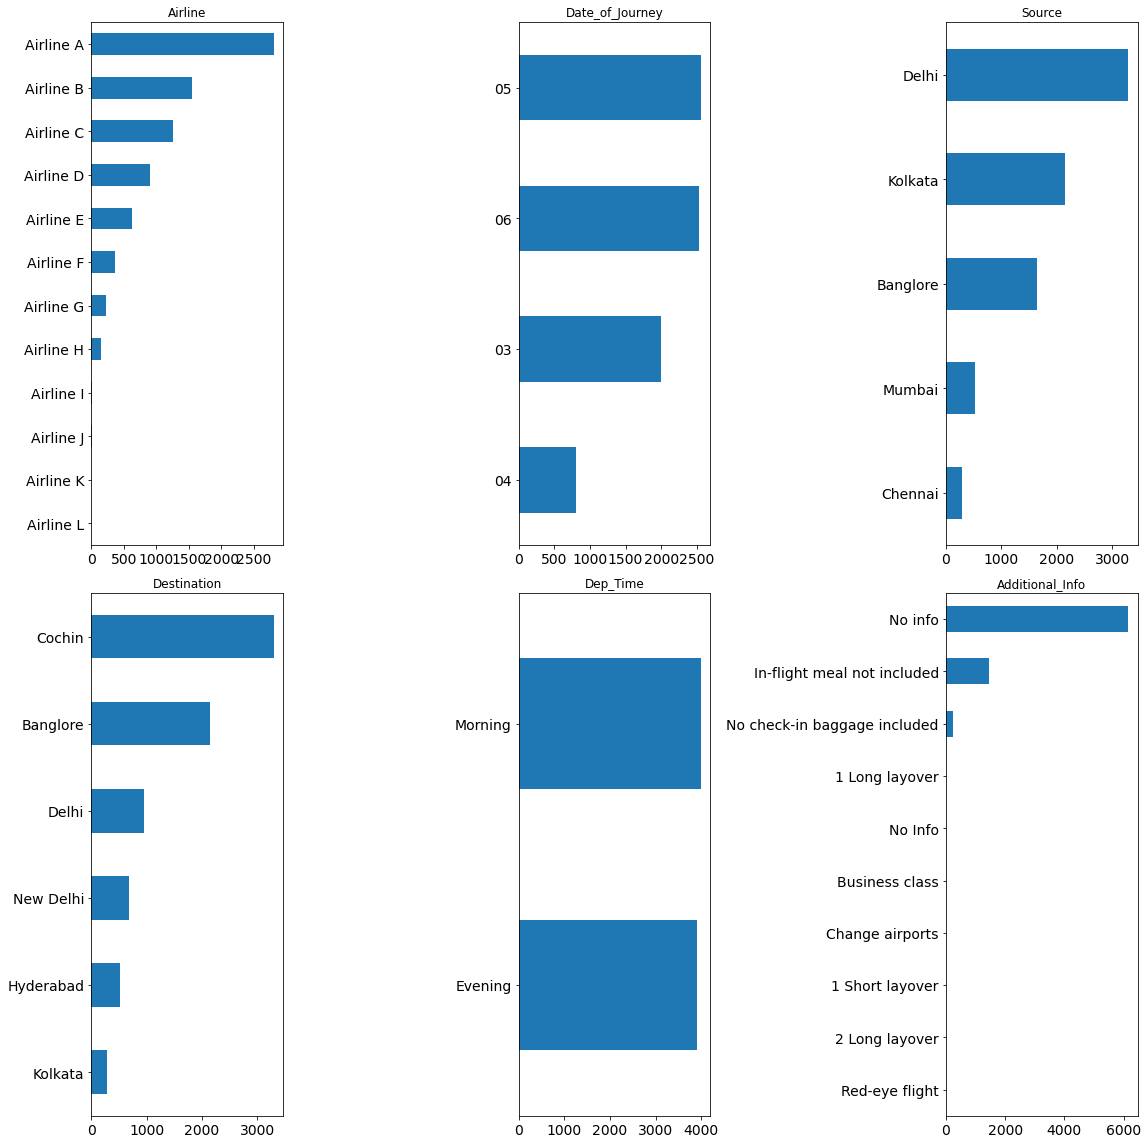

In [55]:
fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(dataframe_cat.columns):
    _ = dataframe_cat[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

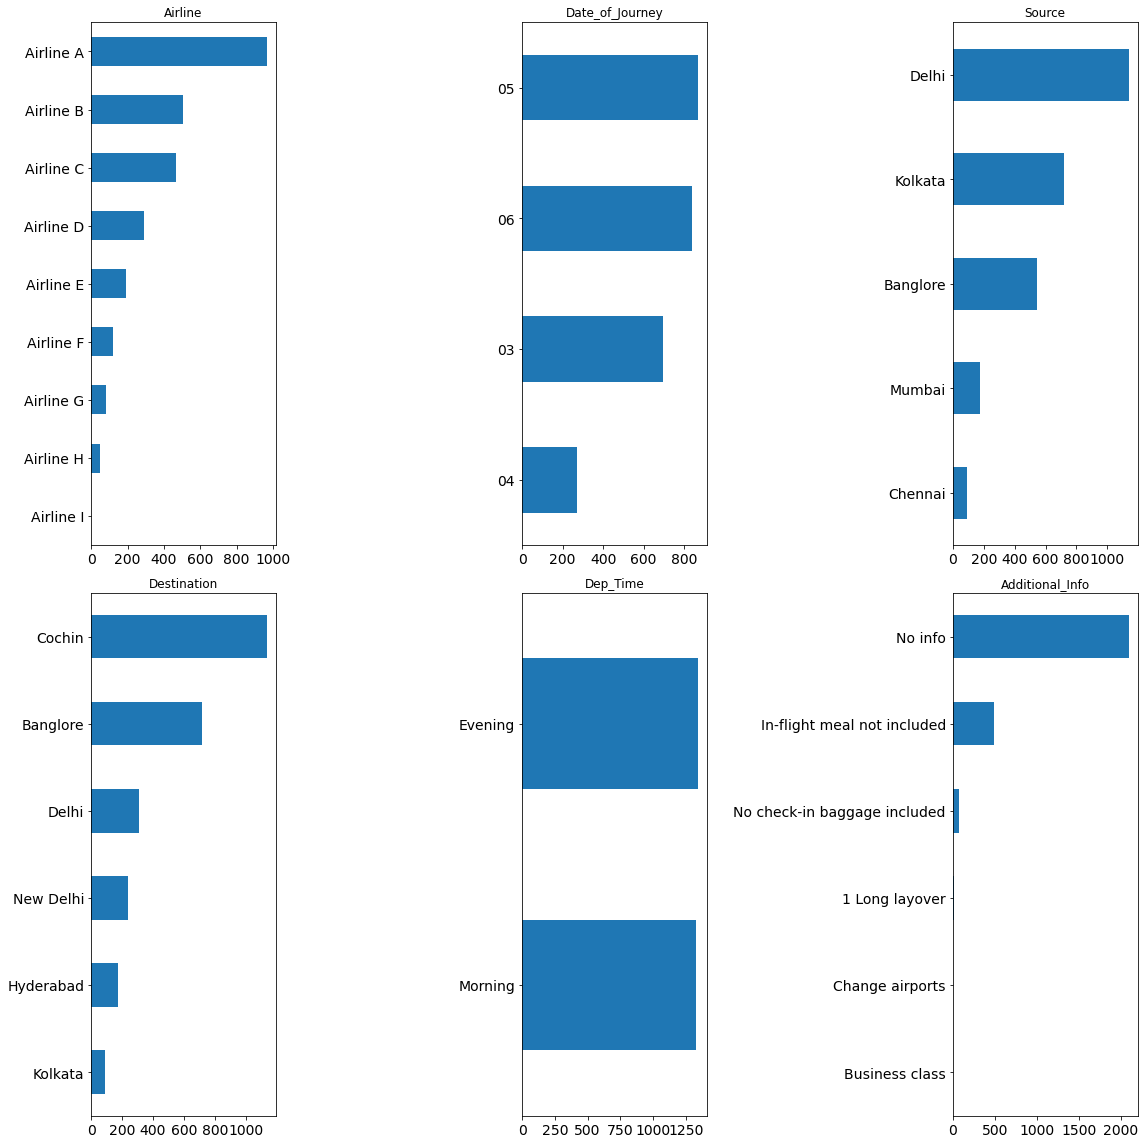

In [56]:
fig, axes = plt.subplots(2,3,figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(dataframe_cat_test.columns):
    _ = dataframe_cat_test[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

In [57]:
train['Additional_Info'].value_counts()

No info                         6162
In-flight meal not included     1465
No check-in baggage included     247
1 Long layover                     9
No Info                            3
Business class                     3
Change airports                    2
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [58]:
test['Additional_Info'].value_counts()

No info                         2094
In-flight meal not included      490
No check-in baggage included      71
1 Long layover                    10
Change airports                    5
Business class                     1
Name: Additional_Info, dtype: int64

dropping the rows not there in test dataset

In [59]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,06,Delhi,Cochin,Evening,765,1,No info,7480
1,Airline A,06,Banglore,Delhi,Evening,185,0,No info,8016
2,Airline C,05,Delhi,Cochin,Morning,925,1,No info,8879
3,Airline A,05,Kolkata,Banglore,Evening,735,1,In-flight meal not included,9663
4,Airline A,05,Kolkata,Banglore,Morning,330,1,In-flight meal not included,9663


In [60]:
train=train[train.Additional_Info != '2 Long layover']
train=train[train.Additional_Info != 'No Info']
train=train[train.Additional_Info != '1 Short layover']
train=train[train.Additional_Info != 'Red-eye flight']

In [61]:
train['Airline'].value_counts()

Airline A    2807
Airline B    1542
Airline C    1250
Airline D     906
Airline E     622
Airline F     359
Airline G     234
Airline H     146
Airline I      12
Airline J       6
Airline K       3
Airline L       1
Name: Airline, dtype: int64

In [62]:
test['Airline'].value_counts()

Airline A    968
Airline B    503
Airline C    465
Airline D    290
Airline E    193
Airline F    119
Airline G     84
Airline H     48
Airline I      1
Name: Airline, dtype: int64

In [63]:
train=train[train.Airline != 'Airline J']
train=train[train.Airline != 'Airline K']
train=train[train.Airline != 'Airline L']


In [64]:
train.shape

(7878, 9)

In [65]:
df=train.copy()

Univariate Analysis - Boxplots for numerical data

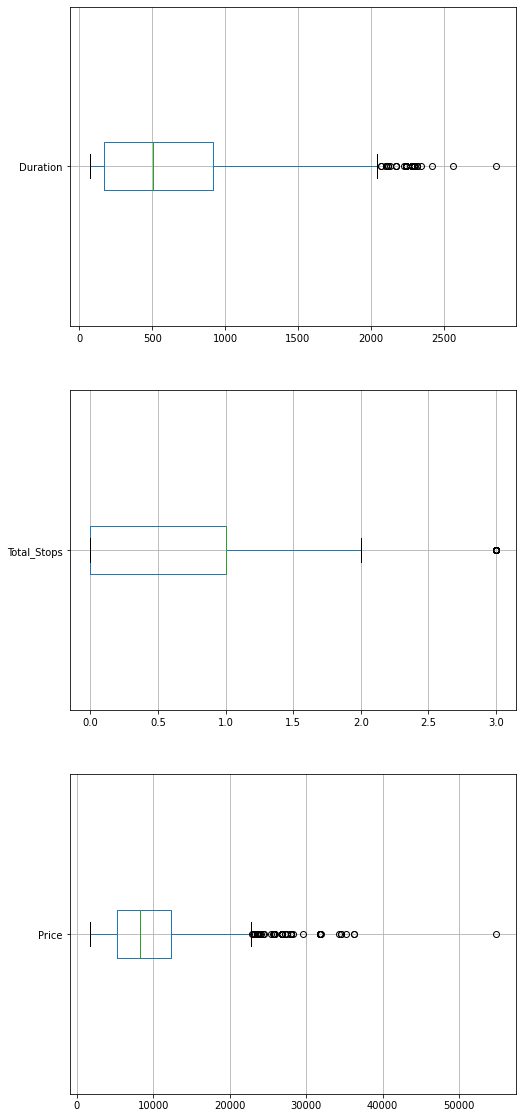

In [66]:
fig, axes = plt.subplots(3, 1, figsize=(8, 20))
for i, c in enumerate(dataframe_con.columns):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

Heatmap for categorical data

In [67]:
dataframe_cat.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Additional_Info'],
      dtype='object')

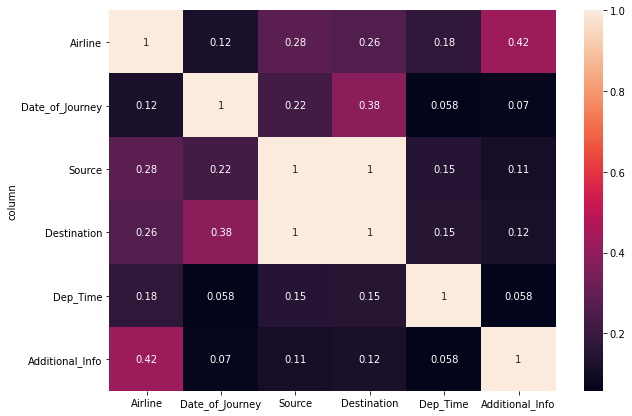

In [68]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



categorical=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time','Additional_Info']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

Heatmap for numerical data

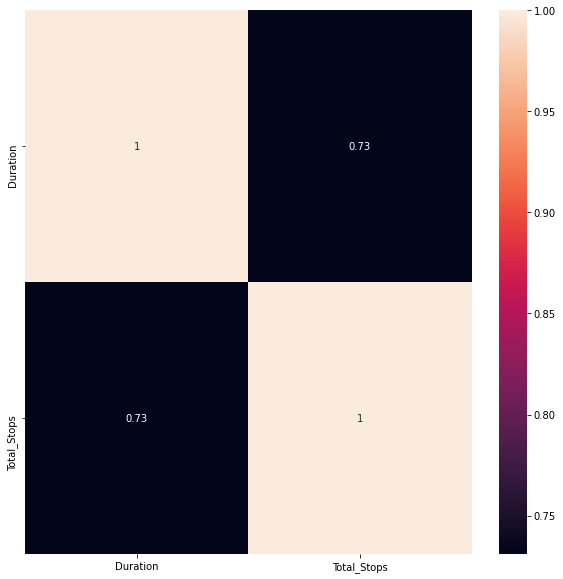

In [69]:
corr=dataframe_con.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,10))
sns.heatmap(dataframe_con[top_features].corr(),annot=True)

Using get dummies to convert categorical variable into dummy/indicator variables.

In [70]:
data1 = pd.get_dummies(train,columns=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time','Additional_Info'],drop_first=True)

In [71]:
data1_test = pd.get_dummies(test,columns=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time','Additional_Info'],drop_first=True)

In [72]:
train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,06,Delhi,Cochin,Evening,765,1,No info,7480
1,Airline A,06,Banglore,Delhi,Evening,185,0,No info,8016
2,Airline C,05,Delhi,Cochin,Morning,925,1,No info,8879
3,Airline A,05,Kolkata,Banglore,Evening,735,1,In-flight meal not included,9663
4,Airline A,05,Kolkata,Banglore,Morning,330,1,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...
8007,Airline A,06,Kolkata,Banglore,Morning,1330,1,In-flight meal not included,7594
8008,Airline C,06,Delhi,Cochin,Evening,1275,2,No info,10651
8009,Airline A,03,Delhi,Cochin,Morning,1225,1,No info,17024
8010,Airline A,05,Delhi,Cochin,Morning,1505,1,In-flight meal not included,12373


In [73]:
train.shape

(7878, 9)

In [74]:
test.shape

(2671, 8)

In [75]:
data1.shape

(7878, 28)

In [76]:
data1_test.columns

Index(['Duration', 'Total_Stops', 'Airline_Airline B', 'Airline_Airline C',
       'Airline_Airline D', 'Airline_Airline E', 'Airline_Airline F',
       'Airline_Airline G', 'Airline_Airline H', 'Airline_Airline I',
       'Date_of_Journey_04', 'Date_of_Journey_05', 'Date_of_Journey_06',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Dep_Time_Morning',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info'],
      dtype='object')

In [77]:
data1_test.drop(['Additional_Info_Business class'],axis=1,inplace=True)

In [78]:
data1_test.shape

(2671, 27)

In [79]:
data1.shape

(7878, 28)

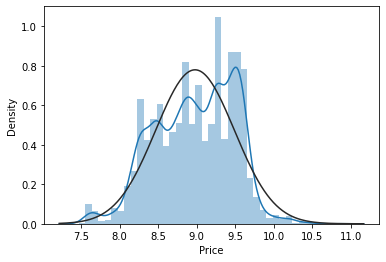

In [80]:
#Check the new distribution 
from scipy.stats import norm, skew 
sns.distplot(np.log1p(data1["Price"]) , fit=norm);

In [81]:
data1.head()

,Duration,Total_Stops,Price,Airline_Airline B,Airline_Airline C,Airline_Airline D,Airline_Airline E,Airline_Airline F,Airline_Airline G,Airline_Airline H,Airline_Airline I,Date_of_Journey_04,Date_of_Journey_05,Date_of_Journey_06,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_Time_Morning,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,765,1,7480,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,185,0,8016,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,925,1,8879,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,735,1,9663,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,330,1,9663,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [82]:
X = data1.drop(['Price'],axis=1)
y = data1['Price']

In [83]:
for x in X.columns:
  X[x]=X[x].astype(int)
  df_types = X.dtypes.value_counts()
print(df_types)

int64    27
dtype: int64


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7878 entries, 0 to 8011
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Duration                                      7878 non-null   int64
 1   Total_Stops                                   7878 non-null   int64
 2   Airline_Airline B                             7878 non-null   int64
 3   Airline_Airline C                             7878 non-null   int64
 4   Airline_Airline D                             7878 non-null   int64
 5   Airline_Airline E                             7878 non-null   int64
 6   Airline_Airline F                             7878 non-null   int64
 7   Airline_Airline G                             7878 non-null   int64
 8   Airline_Airline H                             7878 non-null   int64
 9   Airline_Airline I                             7878 non-null   int64
 10  Date_of_Jour

In [85]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=10)

from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor(n_estimators=500,random_state=0)
rr.fit(x_train,y_train)

y_pred=rr.predict(x_test)

def rmsle(Y,YH):
  sum=0
  for y,yh in zip(Y,YH):
    sum+=(np.log(y)-np.log(yh))**2
  return (sum/(Y.shape[0]))**0.5

1-rmsle(y_test,y_pred)

yy_pred=rr.predict(data1_test)
yy_pred=yy_pred.astype(int)




In [86]:
submission=pd.DataFrame({'Price':yy_pred})


In [87]:
submission

,Price
0,7249
1,3894
2,12369
3,13322
4,6293
...,...
2666,11126
2667,4146
2668,13406
2669,4759


In [88]:
submission.to_csv('Final_Predictions.csv',index=False)